In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
df_train=pd.read_csv('Training.csv')
df_train.shape

(4920, 133)

In [67]:
df_test=pd.read_csv('Testing.csv')
df_test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [73]:
df_test.shape

(41, 133)

In [72]:
df=pd.concat([df_train,df_test])
df.shape

(4961, 133)

<Axes: >

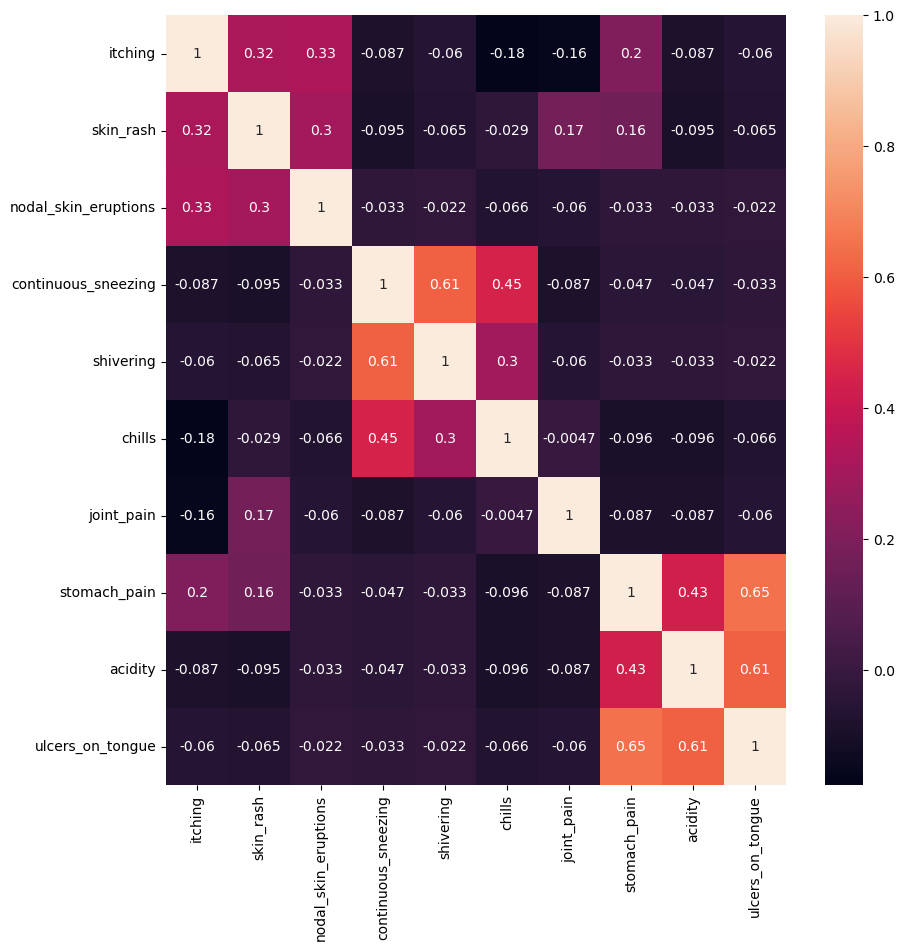

In [74]:
plt.figure(figsize=(10,10))
correlation=(df_train.iloc[:,:10]).corr()
sns.heatmap(correlation,annot=True)

In [75]:
x=df.drop(['prognosis'],axis=1)
y=df['prognosis']

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [77]:
model=tree.DecisionTreeClassifier()

In [78]:
model.fit(x,y)
model.score(x,y)

1.0

In [79]:
model.score(x_test,y_test)
pred=model.predict(x_test)

In [80]:
print(classification_report(y_test,pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        19
                                   AIDS       1.00      1.00      1.00        25
                                   Acne       1.00      1.00      1.00        29
                    Alcoholic hepatitis       1.00      1.00      1.00        30
                                Allergy       1.00      1.00      1.00        32
                              Arthritis       1.00      1.00      1.00        21
                       Bronchial Asthma       1.00      1.00      1.00        31
                   Cervical spondylosis       1.00      1.00      1.00        22
                            Chicken pox       1.00      1.00      1.00        26
                    Chronic cholestasis       1.00      1.00      1.00        21
                            Common Cold       1.00      1.00      1.00        25
                           

In [85]:
from sklearn.model_selection import cross_validate,cross_val_predict,KFold

In [86]:
kf=KFold(n_splits=5,random_state=False,shuffle=True)

In [84]:
validate=cross_validate(model,x,y,cv=5)
validate

{'fit_time': array([0.03816295, 0.04805255, 0.04901266, 0.03209877, 0.03087068]),
 'score_time': array([0.00795698, 0.        , 0.0043292 , 0.        , 0.00360489]),
 'test_score': array([1., 1., 1., 1., 1.])}